In [1]:
from numpy import array
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.preprocessing.sequence import TimeseriesGenerator
import copy
from statsmodels.tsa.stattools import pacf
import matplotlib.pyplot as plt
from sklearn import preprocessing

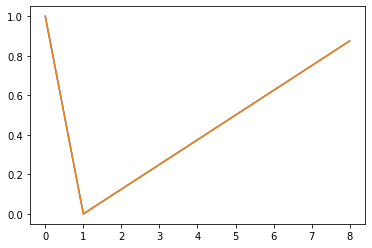

In [12]:

aa=[1,2,3,4,5,6,7,8,9,1,2,3,4,5,6,7,8,9,1,2,3,4,5,6,7,8,9,1,2,3,4,5,6,7,8,9]
aaa=copy.deepcopy(aa)
xmin = min(aa) 
xmax=max(aa)
for i, x in enumerate(aaa):
    aaa[i] = (x-xmin) / (xmax-xmin)

series = array(aaa)
n_features = 1
series = series.reshape((len(series), n_features))

n_input =9
endd=len(aaa)-1
plt.plot(aaa[endd-n_input:endd])
bb=aaa[endd-n_input:endd]
len(bb)
plt.plot(bb)

In [13]:
# define generator
generator = TimeseriesGenerator(series, series, length=n_input, batch_size=1)
# define model
model = Sequential()
model.add(LSTM(units =50, activation = 'tanh', recurrent_activation ='hard_sigmoid', input_shape=(n_input, n_features)))
model.add(Dense (units =1, activation = 'linear'))
model.compile ( loss ='mean_squared_error',optimizer = 'rmsprop')
# fit model
model.fit(generator, steps_per_epoch=1, epochs=500, verbose=1,shuffle = True)

Epoch 1/500
1/1 [==============================] - 4s 4s/step - loss: 0.1207
Epoch 2/500
1/1 [==============================] - 0s 33ms/step - loss: 0.0270
Epoch 3/500
1/1 [==============================] - 0s 31ms/step - loss: 0.8060
Epoch 4/500
1/1 [==============================] - 0s 35ms/step - loss: 0.4998
Epoch 5/500
1/1 [==============================] - 0s 33ms/step - loss: 3.8599e-04
Epoch 6/500
1/1 [==============================] - 0s 32ms/step - loss: 0.0693
Epoch 7/500
1/1 [==============================] - 0s 42ms/step - loss: 0.3156
Epoch 8/500
1/1 [==============================] - 0s 31ms/step - loss: 0.0719
Epoch 9/500
1/1 [==============================] - 0s 39ms/step - loss: 0.0012
Epoch 10/500
1/1 [==============================] - 0s 49ms/step - loss: 0.2450
Epoch 11/500
1/1 [==============================] - 0s 33ms/step - loss: 0.0368
Epoch 12/500
1/1 [==============================] - 0s 39ms/step - loss: 7.2494e-04
Epoch 13/500
1/1 [=========================

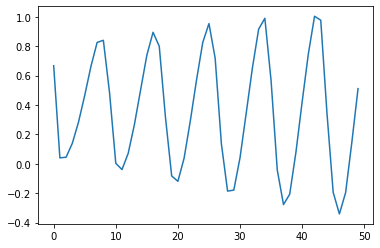

In [14]:
origin_input=copy.deepcopy(bb)
ans=[]
for i in range(0,50):
    now_input=array(origin_input).reshape((1, n_input, n_features))
    yhat = model.predict(now_input, verbose=0)
    # print(i,yhat[0][0])
    ans.append(yhat[0][0])
    origin_input.remove(origin_input[0])
    origin_input.append(yhat[0][0])
plt.plot(ans)